# Лабораторная работа 2

## Общая информация

Дата выдачи: 01.03.2016

Срок сдачи: 10.03.2016 09:00MSK 

### О задании
Лабораторная работа №2 направлена на знакомство с линеной регрессией и методами её регуляризации. 

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Обратите внимание, что некоторые задачи требуют письменных комментариев. Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины больше не является уважительной причиной для продления дедлайна.

### Формат сдачи
Для сдачи задания скачайте *(File -> Download as -> IPython notebook)* и переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *Username_(group)_Lab2.ipynb*, где Username — ваша фамилия на латинице, group — название группы (например, Struminskiy_IAD-20_Lab2.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма *[ИАД-NN] - Лабораторная работа 2 - Фамилия Имя Отчество*.



# Задание
## Полиномиальная регрессия, подбор параметров

В следующей модельной задаче мы поближе познакомимся с некоторыми приемами восстановления зависимости с помощью линейной регрессии.

Мы будем восстанавливать зашумленные значения функции $\sin(x)$, в выборке у нас будет всего лишь 30 точек со значениями.

In [6]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

def generate_data(n, se, x_min, x_max):
    '''
    Функция возвращает зашумленные знаения sin(x) 
    в n точках равномерного разбиения [x_min, x_max)
    '''
    xx = np.linspace(x_min, x_max, n)
    yy = np.sin(xx) + se * np.random.randn(n)
    return xx.reshape(-1, 1), yy

N = 30
se = 0.5
x_min = 0
x_max = 2 * np.pi

X, y = generate_data(N, se, x_min, x_max)

Далее в задании будет требоваться рисовать графики. В некоторых ячейках необходимый для этого код уже написан, в некоторых графики предлагается построить самостоятельно. Строить графики можно основываясь на примере следующих двух ячеек с кодом, за подробностями можно обратиться по адресу https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb.

Нарисуем на графике точки наблюдений и истинную зависимость:

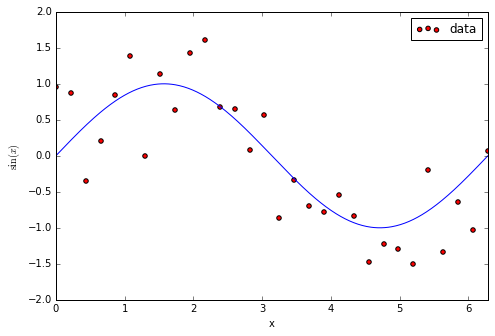

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X, y, c = (1, 0, 0), label = 'data')

xx = np.linspace(x_min, x_max, 500)
ax.plot(xx, np.sin(xx));

ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel('x')
ax.set_ylabel('$\sin(x)$')
ax.legend();

Для реализации регрессии вам предлагается пользоваться классами из библиотеки sklearn, в которой собраны практически все основные методы машинного обучения.

Базовым методом построения регрессии является линейная регрессия. Она реализована в классе LinearRegression из модуля sklearn.linear_model. Описание класса: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Пользоваться этой библиотекой крайне просто:

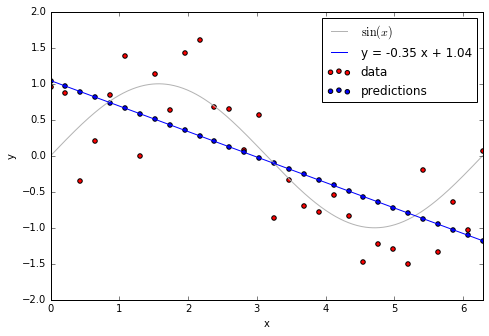

In [8]:
import sklearn.linear_model as lm

lr = lm.LinearRegression()
# функция  fit принимает в качестве параметров матрицу признаков обучающей выборки X и набор целевых значений y 
lr = lr.fit(X, y)
# в переменной lr.intercept_ хранится значение свободного члена регрессии
# а в lr.coef_ хранится значение коэффициентов при признаках

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
xx = np.linspace(0, 2 * np.pi, 500)
ax.plot(xx, np.sin(xx), c = (0.7, 0.7, 0.7), label = '$\sin(x)$')
ax.scatter(X, y, c = 'r', label = 'data')
ax.scatter(X, lr.predict(X.reshape(-1, 1)), label = 'predictions')
ax.plot(xx,
        lr.predict(xx.reshape(-1, 1)),
        label = ('y = %.2f x + %.2f' % (lr.coef_[0],lr.intercept_)))

ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

Как можно видеть, приближать $\sin(x)$ линейной функцией - плохая идея. Однако линейная регрессия способна на большее. 

Если в качестве признаков брать не только $x$, но и степени $x^2, x^3, x^4$ и т.д., формула $$f(x) = b + \sum w_i x^i $$
оказывается способна приблизить уже произвольный полином. Линейная регрессия с таким выбором признаков называется полиномиальной регрессией, а сами признаки называются полиномиальными.

** Задача 1. (2 балла) ** Напишите функцию, которая по массиву точек X (размера N x 1) генерирует таблицу с полиномиальными признаками X_new (размера N x d, в её строчказ будут степени x от 1 до d).

In [ ]:
"""
Такая функция, конечно, реализована в sklearn, но все-таки...
Пример работы:
>>> x = np.asarray([[0.0], [2], [5]])
>>> x_new = polynomial_features(x, d = 4)
>>> x_new

array([[   0.,    0.,    0.,    0.],
       [   2.,    4.,    8.,   16.],
       [   5.,   25.,  125.,  625.]])
"""
def polynomial_features(x, d):
    """
    Вам может помочь np.concatenate
    Желательно добавить комментарии к коду
    """
    pass

Вплоть до какой степени брать полиномиальные признаки? Этот вопрос широко исследован, но мы ответ на него просто подберем.

**Задача 2. (2 балла) ** Нарисуйте график зависимости, восстановленной полиномильной регрессий с семью полиномиальными признаками (степени от 1 до 7). Хорошо ли он приближает истинную зависимость?

** Задача 3. (2 балла) ** Напишите функцию, которая в цикле обучает регрессию с $d$ полиномиальными (цикл по d от 1 до n) и возвращает номер лучшей обученой модели. Лучшей считать ту модель, для которой сумма квадратов ошибок предсказаний $\sum (\sin(x_i) - f(x_i))^2$ минимальна. Протестируйте её для макимальной степени $n = 10$, нарисуйте график предсказанной зависимости, сравните его с графиком из пунта 2.

In [ ]:
def choose_d(X, y, n):
    """
    Прокомментируйте и обоснуйте работу функции
    """
    pass

Отбросить лишние полиномиальные признаки - один из способов борьбы с переобучением, но не всегда так очевидно что можно отбросить.
Другой стандартный способ борьбы с плохой работой обученного алгоритма - введение штрафов на значение параметров, регуляризация.

Функционал ошибки в линейной регрессии имел вид 
$$ Q(w, b) = \sum_{i=1}^\ell (<x_i, w> + b - y_i)^2 $$

Рассмотрим функционал
$$ Q(w, b, \alpha) = \sum_{i=1}^\ell (<x_i, w> + b - y_i)^2 + \alpha \sum_{d=1}^D w_d^2$$

и

$$ Q(w, b, \alpha) = \sum_{i=1}^\ell (<x_i, w> + b - y_i)^2 + \alpha \sum_{d=1}^D |w_d|. $$

В них положительный вклад вносят не только ошибки предсказания, но и значения весов регресии. Из-за последнего получается, что модель стремится не только как можно точнее описать выборку, но и описать не очень сложной зависимостью.

Значимость штрафа в функционале регулируется с помощью нового параметра $\alpha$. От выбора этого параметра,также как и от степени в полиномиальной регрессии, зависит поведение модели.

Линейные регрессии, обучаемые в этими функционалами ошибки, называются Ridge и Lasso соответственно. Почитать про их реализации можно тут:

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
    
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

** Задача 4. (2 балла) ** Для полученного в пункте 3 параметра $n$ обучите Ridge и Lasso регрессию на модельных данных при значении $\alpha = 1$, постройте графики восстановленной зависимости, сравните их с работой обычной регрессией. Предложите способ можно подбирать параметр $\alpha$?

In [ ]:
# ячейка для кода с Ridge регрессией

In [ ]:
# ячейка для кода с Lasso регрессией

## Шумовые и зависимые признаки

Если в предыдущем пункте нам приходилось добавлять признаки, в этом пункте мы рассмотрим ситуацию, в которой признаки избыточны

Ниже сгенерированы 100 объектов с четыремя признаками: пара первых пробегает единичный квадрат, третий является их линейной комбинацией, а четвертый представляет собой просто случайную величину. Целевое значение - сумма первых двух признаков.

In [ ]:
x_1, x_2 = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
x_3 = 2 * x_1 + 3 * x_2 

x_1 = x_1.reshape(100, 1)
x_2 = x_2.reshape(100, 1)
x_3 = x_3.reshape(100, 1)
x_4 = np.random.randn(100, 1)

y = x_1 + x_2 + 0.3 * np.random.randn(100, 1)
y = y.reshape(100)
X = np.concatenate((x_1, x_2, x_3, x_4), axis = 1)

**Задача 5. (4 балла) ** Чем больше вес у признака в линеной регрессии, тем больший вклад он вносит в предсказание. Изучим вклад третьего и четвертого признаков.
* Какие коэффиенты получаются у обычной линейной регрессии при восстановлении y по X?

* Для параметров $\alpha$ в массиве *np.exp(np.linspace(-10, 0., 100))* обучите Lasso регрессию. Постройте график значений весов регрессии в зависимости от $\alpha$ (4 кривых на одном графике). Выпишите также

In [ ]:
"""
В этой части задания работу кода необходимо прокомментировать
"""

* Для параметров $\alpha$ в массиве *np.exp(np.linspace(-5, 10, 100))* обучите Ridge регрессию. Постройте график значений весов регрессии в зависимости от $\alpha$ (4 кривых на одном графике)

In [ ]:
"""
В этой части задания работу кода необходимо прокомментировать
"""

Можно ли сказать, что Lasso регрессия при некоторых значениях $\alpha$ выбирает подмножество информативных признаков, делая веса остальных близкими к 0?
Можно ли сказать, что Ridge регрессия использует линейно независимые признаки при некоторых $\alpha$? 